In [6]:
# Loading neccesary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import  stats
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')

In [7]:

%matplotlib inline
# without this the plots would be opened  in a new window (not browser)
# with this instruction plots will be included in the notebook

In [8]:
# Use %config InlineBackend.figure_format = 'retina'
# after %matplotlib inline to render higher resolution images
%config InlineBackend.figure_format = 'retina'

In [9]:
# If you wish to use Google colab, the following code will allow you to mount your Google Drive. Otherwise, comment on the following lines.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
# To print multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [20]:
house_data = pd.read_csv('gdrive/MyDrive/sec-data/house_and_mortgage.csv')
# data = pd.read_csv('gdrive/MyDrive/Project/StudentPerformanceFactors.csv')
# data=pd.read_csv('gdrive/MyDrive/StudentPerformanceFactors.csv')
#Print that data imported successfully
print("Data imported successfully")

# show example of how data looks
house_data

Data imported successfully


,Year,House Worth (CAD),Fixed Rate (%),Fixed Monthly Payment (CAD)
0,2011,"500,000.00",5.39,"2,126.38"
1,2012,"540,000.00",5.24,"2,095.30"
2,2013,"550,000.00",5.24,"2,095.30"
3,2014,"575,000.00",4.79,"2,003.47"
4,2015,"600,000.00",4.64,"1,973.33"
5,2016,"700,000.00",4.64,"1,973.33"
6,2017,"800,000.00",4.64,"1,973.33"
7,2018,"750,000.00",5.34,"2,115.99"
8,2019,"775,000.00",5.34,"2,115.99"
9,2020,"825,000.00",4.94,"2,033.85"


In this task, we used the SARIMA (Seasonal AutoRegressive Integrated Moving Average) model to forecast House Worth (CAD), Fixed Rate (%), and Fixed Monthly Payment (CAD). The SARIMA model was chosen because it is well-suited for time-series data, particularly when trends and potential seasonality might influence the metrics. It combines differencing (to handle trends), autoregression, moving averages, and seasonal adjustments, making it robust for capturing patterns in financial and economic datasets.

The prediction started from 2023, but the focus was on providing a filtered dataset for 2024 through 2033. The predictions were saved to a CSV file (predicted_house_and_mortgage.csv) for further use and visualized alongside historical data to show continuity and trends in the metrics. This approach ensures that future projections align with historical patterns while excluding unnecessary years for better clarity and utility.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'House Worth (CAD) Over Time')

Text(0, 0.5, 'House Worth (CAD)')

<Axes: >

Text(0.5, 1.0, 'Fixed Rate (%) Over Time')

Text(0, 0.5, 'Fixed Rate (%)')

<Axes: >

Text(0.5, 1.0, 'Fixed Monthly Payment (CAD) Over Time')

Text(0, 0.5, 'Monthly Payment (CAD)')

Text(0.5, 0, 'Year')

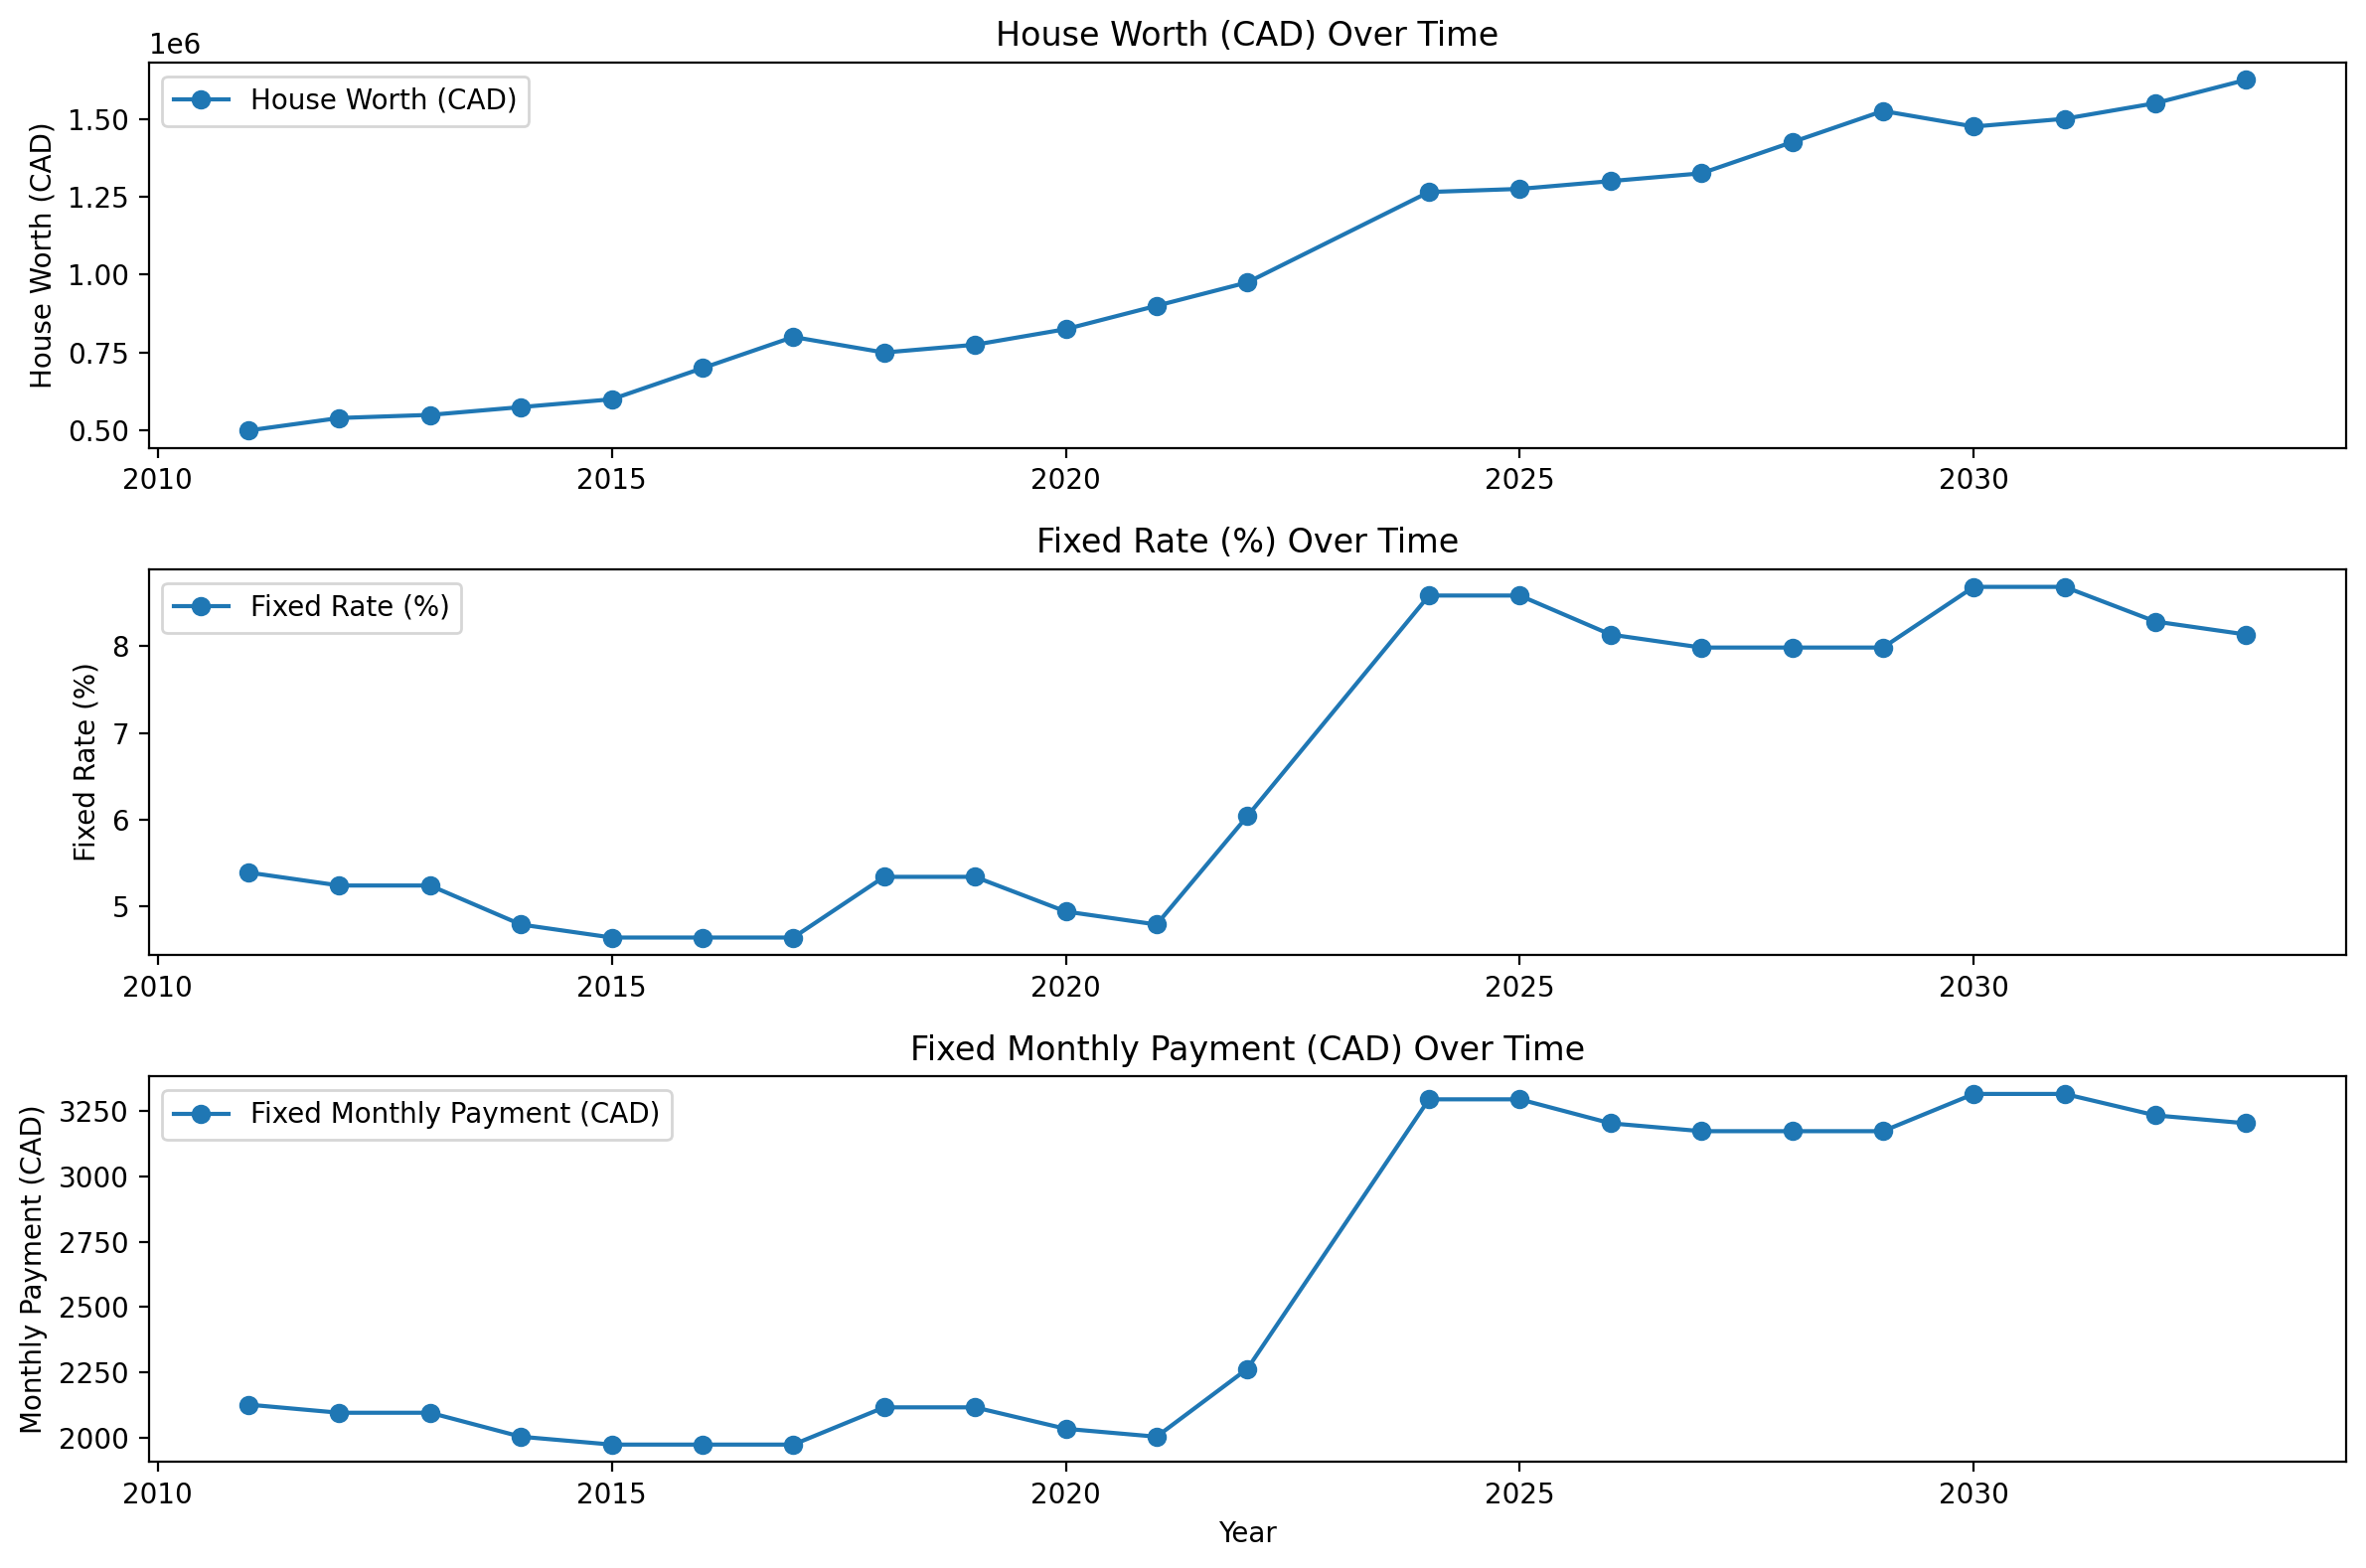

In [33]:
# For housing and mortgage
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load and clean the dataset
house_and_mortgage_data = pd.read_csv('gdrive/MyDrive/sec-data/house_and_mortgage.csv')
house_and_mortgage_data['House Worth (CAD)'] = house_and_mortgage_data['House Worth (CAD)'].replace(',', '', regex=True).astype(float)
house_and_mortgage_data['Fixed Rate (%)'] = house_and_mortgage_data['Fixed Rate (%)'].astype(float)
house_and_mortgage_data['Fixed Monthly Payment (CAD)'] = house_and_mortgage_data['Fixed Monthly Payment (CAD)'].replace(',', '', regex=True).astype(float)

# Prepare historical data for SARIMA
historical_data = house_and_mortgage_data[['Year', 'House Worth (CAD)', 'Fixed Rate (%)', 'Fixed Monthly Payment (CAD)']]
historical_data_ts = historical_data.set_index('Year')

# Define SARIMA models for each metric
# House Worth (CAD)
model_house_worth = SARIMAX(historical_data_ts['House Worth (CAD)'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
fit_house_worth = model_house_worth.fit(disp=False)
forecast_house_worth = fit_house_worth.get_forecast(steps=11).predicted_mean

# Fixed Rate (%)
model_fixed_rate = SARIMAX(historical_data_ts['Fixed Rate (%)'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
fit_fixed_rate = model_fixed_rate.fit(disp=False)
forecast_fixed_rate = fit_fixed_rate.get_forecast(steps=11).predicted_mean

# Fixed Monthly Payment (CAD)
model_monthly_payment = SARIMAX(historical_data_ts['Fixed Monthly Payment (CAD)'], order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
fit_monthly_payment = model_monthly_payment.fit(disp=False)
forecast_monthly_payment = fit_monthly_payment.get_forecast(steps=11).predicted_mean

# Create a DataFrame for predictions starting from 2023
forecast_years = list(range(historical_data['Year'].iloc[-1] + 1, historical_data['Year'].iloc[-1] + 12))
sarima_predictions = pd.DataFrame({
    'Year': forecast_years,
    'House Worth (CAD)': forecast_house_worth.values,
    'Fixed Rate (%)': forecast_fixed_rate.values,
    'Fixed Monthly Payment (CAD)': forecast_monthly_payment.values
})

# Filter for 2024 and onward
sarima_predictions_filtered = sarima_predictions[sarima_predictions['Year'] >= 2024]

# Save predictions for 2024 onward to a CSV file
sarima_predictions_filtered.to_csv('predicted_house_and_mortgage.csv', index=False)

# Combine historical and filtered predicted data for visualization
combined_data = pd.concat([
    historical_data[['Year', 'House Worth (CAD)', 'Fixed Rate (%)', 'Fixed Monthly Payment (CAD)']],
    sarima_predictions_filtered
])

# Plot the data
plt.figure(figsize=(12, 8))

# Plot House Worth (CAD)
plt.subplot(3, 1, 1)
plt.plot(combined_data['Year'], combined_data['House Worth (CAD)'], label='House Worth (CAD)', marker='o')
plt.title('House Worth (CAD) Over Time')
plt.ylabel('House Worth (CAD)')
plt.legend()

# Plot Fixed Rate (%)
plt.subplot(3, 1, 2)
plt.plot(combined_data['Year'], combined_data['Fixed Rate (%)'], label='Fixed Rate (%)', marker='o')
plt.title('Fixed Rate (%) Over Time')
plt.ylabel('Fixed Rate (%)')
plt.legend()

# Plot Fixed Monthly Payment (CAD)
plt.subplot(3, 1, 3)
plt.plot(combined_data['Year'], combined_data['Fixed Monthly Payment (CAD)'], label='Fixed Monthly Payment (CAD)', marker='o')
plt.title('Fixed Monthly Payment (CAD) Over Time')
plt.ylabel('Monthly Payment (CAD)')
plt.xlabel('Year')
plt.legend()

plt.tight_layout()
plt.show()



<Figure size 1400x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Average Annual Income (CAD) Over Time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Annual Income (CAD)')

<Axes: >

Text(0.5, 1.0, 'Inflation Rate (%) Over Time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Inflation Rate (%)')

<Axes: >

Text(0.5, 1.0, 'Fixed Monthly Expenses (CAD) Over Time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Fixed Monthly Expenses (CAD)')

<Axes: >

Text(0.5, 1.0, 'Non-Essential Monthly Expenses (CAD) Over Time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Non-Essential Monthly Expenses (CAD)')

<Axes: >

Text(0.5, 1.0, 'Monthly Average Rent (CAD) Over Time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Monthly Average Rent (CAD)')

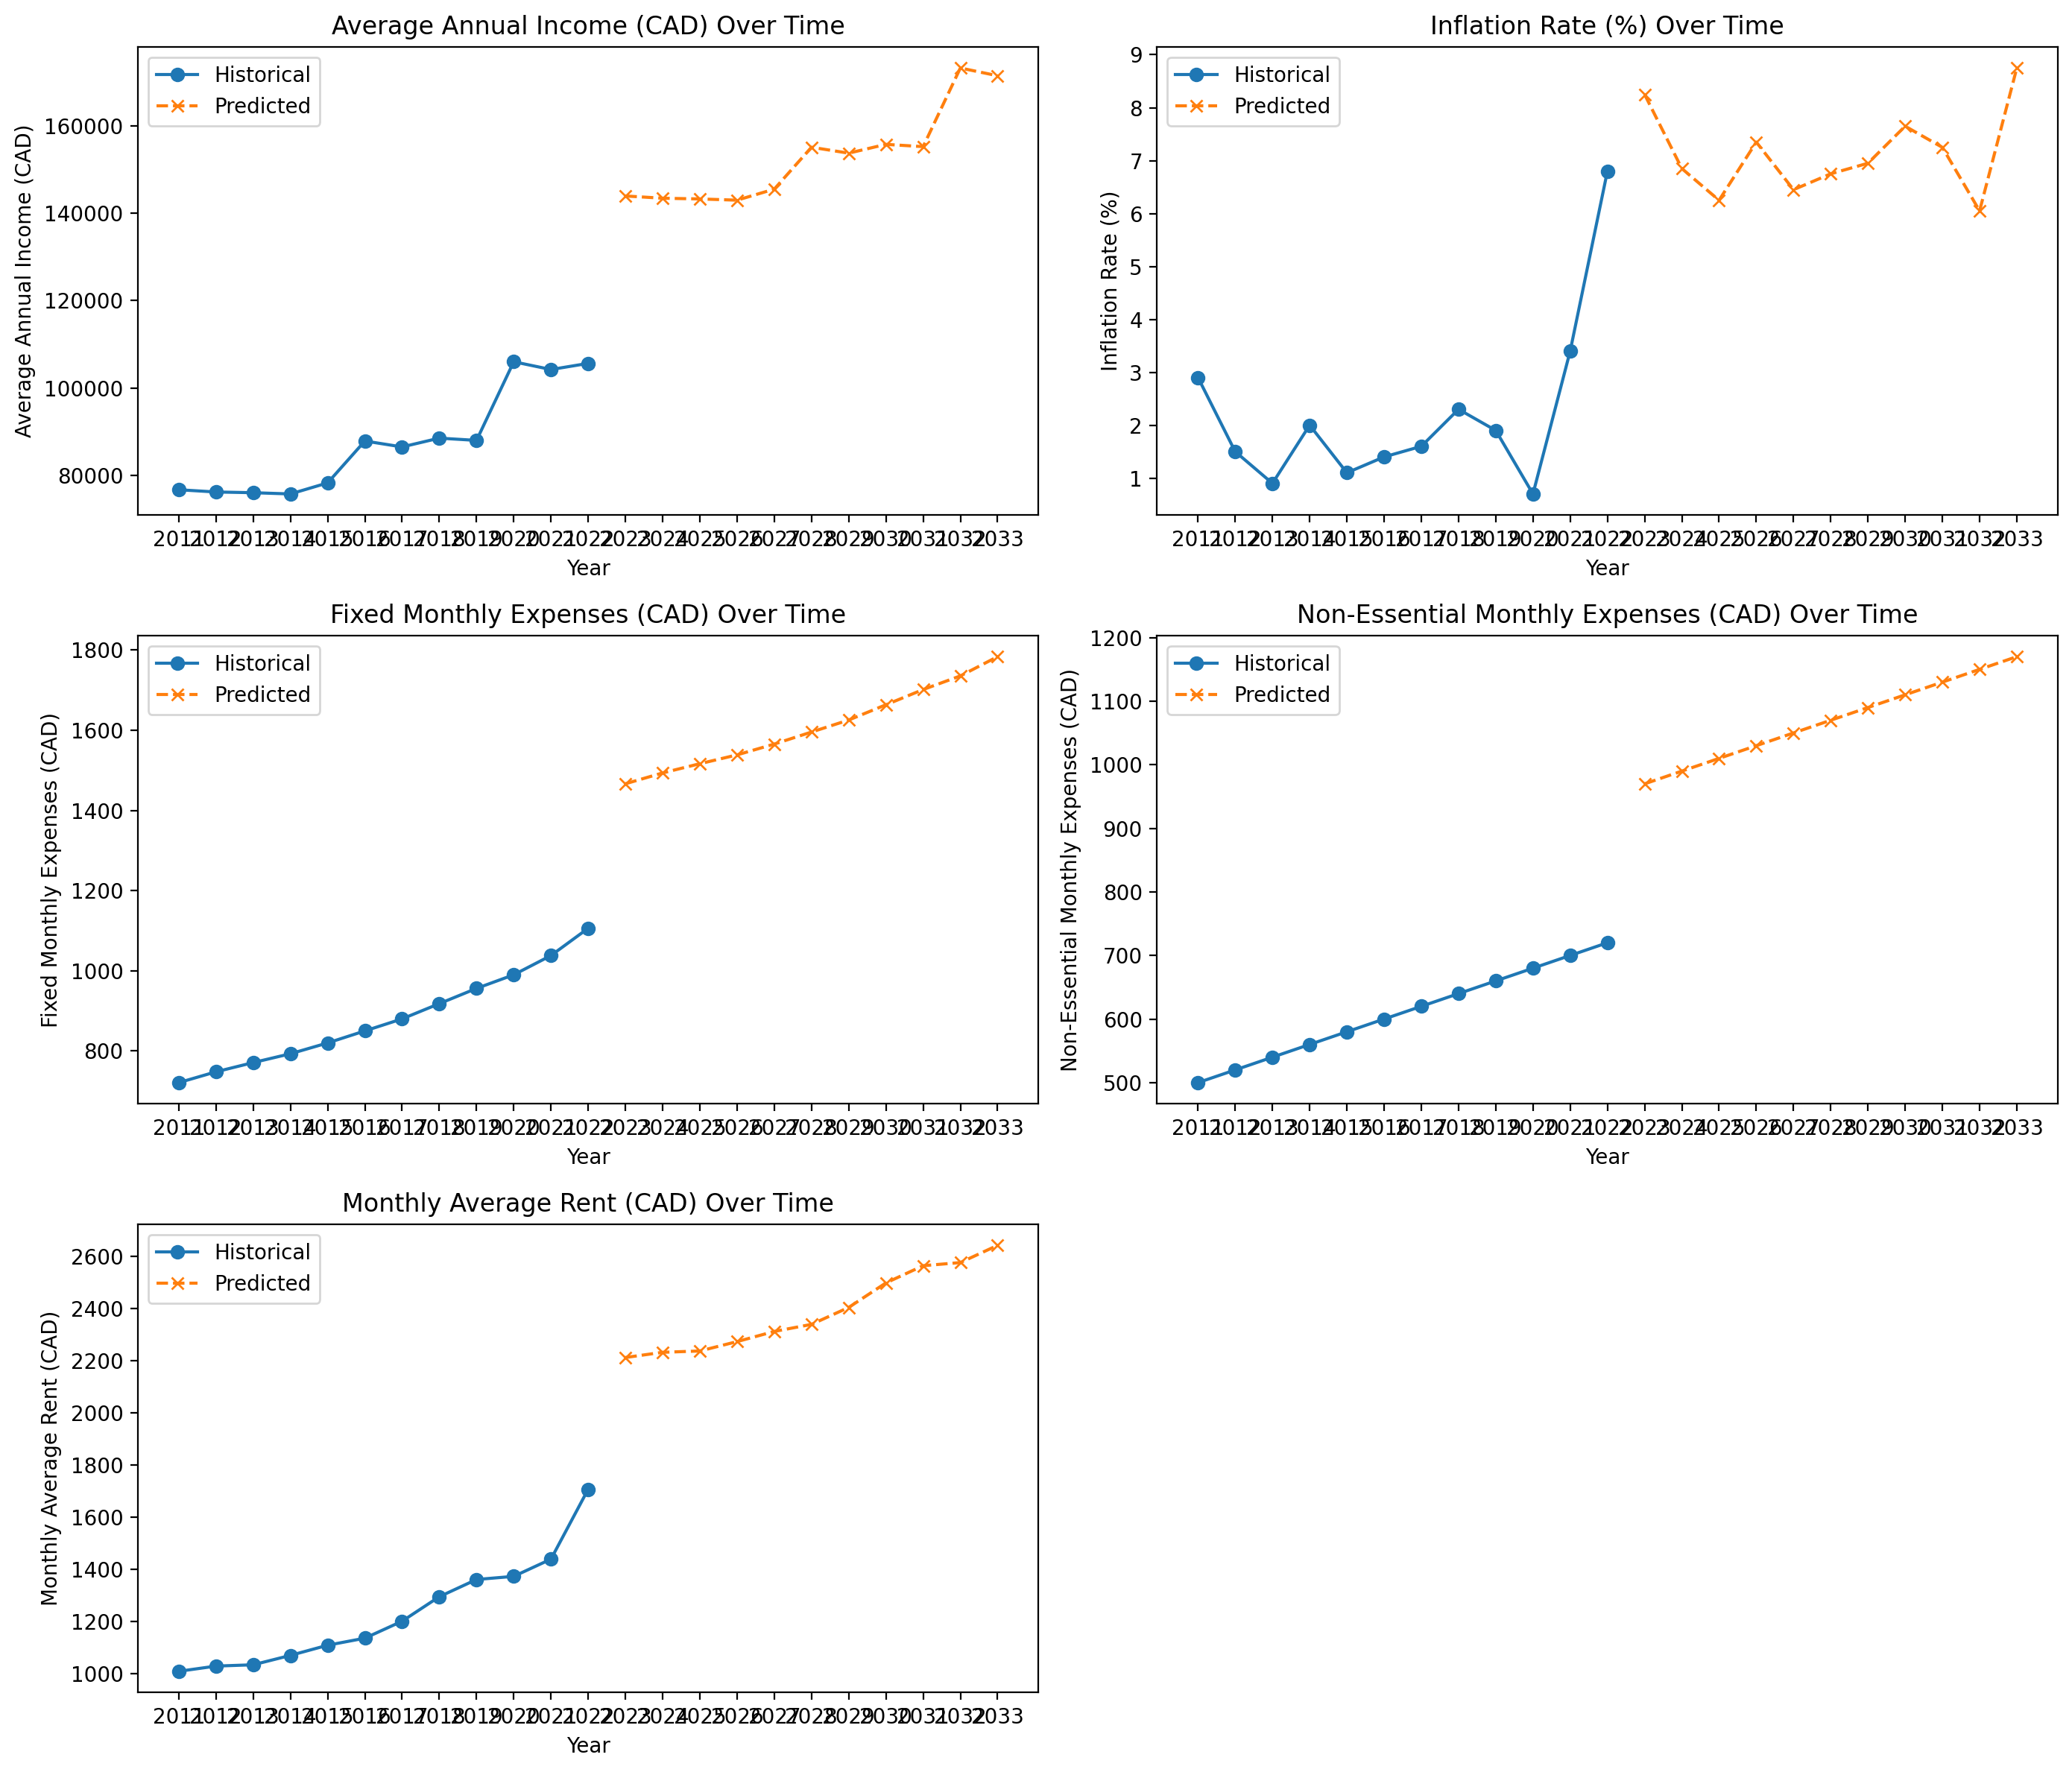

In [43]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load and clean the dataset
income_expenses_data = pd.read_csv('gdrive/MyDrive/sec-data/income_and_expenses.csv')
income_expenses_data.columns = income_expenses_data.columns.str.strip()  # Clean column names
income_expenses_data['Average Annual Income (CAD)'] = income_expenses_data['Average Annual Income (CAD)'].replace(',', '', regex=True).astype(float)

# Ensure the 'Year' column is a PeriodIndex
income_expenses_data['Year'] = pd.PeriodIndex(income_expenses_data['Year'], freq='Y')

# Metrics to predict
metrics_to_predict = [
    'Average Annual Income (CAD)',
    'Inflation Rate (%)',
    'Fixed Monthly Expenses (CAD)',
    'Non-Essential Monthly Expenses (CAD)',
    'Monthly Average Rent (CAD)'
]

# Create a dictionary to store SARIMA models and predictions
sarima_predictions = {}

# Fit SARIMA models and predict each metric for 2023 to 2033
forecast_years = pd.period_range(start='2023', end='2033', freq='Y')
for metric in metrics_to_predict:
    # Set the metric as a time series
    ts_data = income_expenses_data.set_index('Year')[metric]

    # Fit the SARIMA model
    sarima_model = SARIMAX(ts_data, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
    sarima_fit = sarima_model.fit(disp=False)

    # Forecast for 2023 to 2033
    forecast = sarima_fit.get_forecast(steps=len(forecast_years)).predicted_mean
    sarima_predictions[metric] = forecast.values

# Create a DataFrame for predictions
sarima_predictions_df = pd.DataFrame({
    'Year': forecast_years.astype(str),  # Convert PeriodIndex to string for saving
    **sarima_predictions
})

# Filter out 2023 from the output (only 2024-2033)
sarima_predictions_filtered = sarima_predictions_df[sarima_predictions_df['Year'] >= '2024']

# Save the filtered predictions to a CSV file
sarima_predictions_filtered.to_csv('predicted_income_and_expenses.csv', index=False)

# Combine historical and predicted data for visualization
historical_data = income_expenses_data.set_index('Year')[metrics_to_predict]
predicted_data = sarima_predictions_df.set_index('Year')

# Combine historical and predicted data
combined_data = pd.concat([historical_data, predicted_data], axis=0)

# Plot the data for each metric
plt.figure(figsize=(14, 12))

for i, metric in enumerate(metrics_to_predict, start=1):
    plt.subplot(3, 2, i)
    plt.plot(historical_data.index.astype(str), historical_data[metric], label='Historical', marker='o')
    plt.plot(predicted_data.index.astype(str), predicted_data[metric], label='Predicted', linestyle='--', marker='x')
    plt.title(f'{metric} Over Time')
    plt.xlabel('Year')
    plt.ylabel(metric)
    plt.legend()

plt.tight_layout()
plt.show()




<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Savings Interest Rate (%) Over Time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Interest Rate (%)')

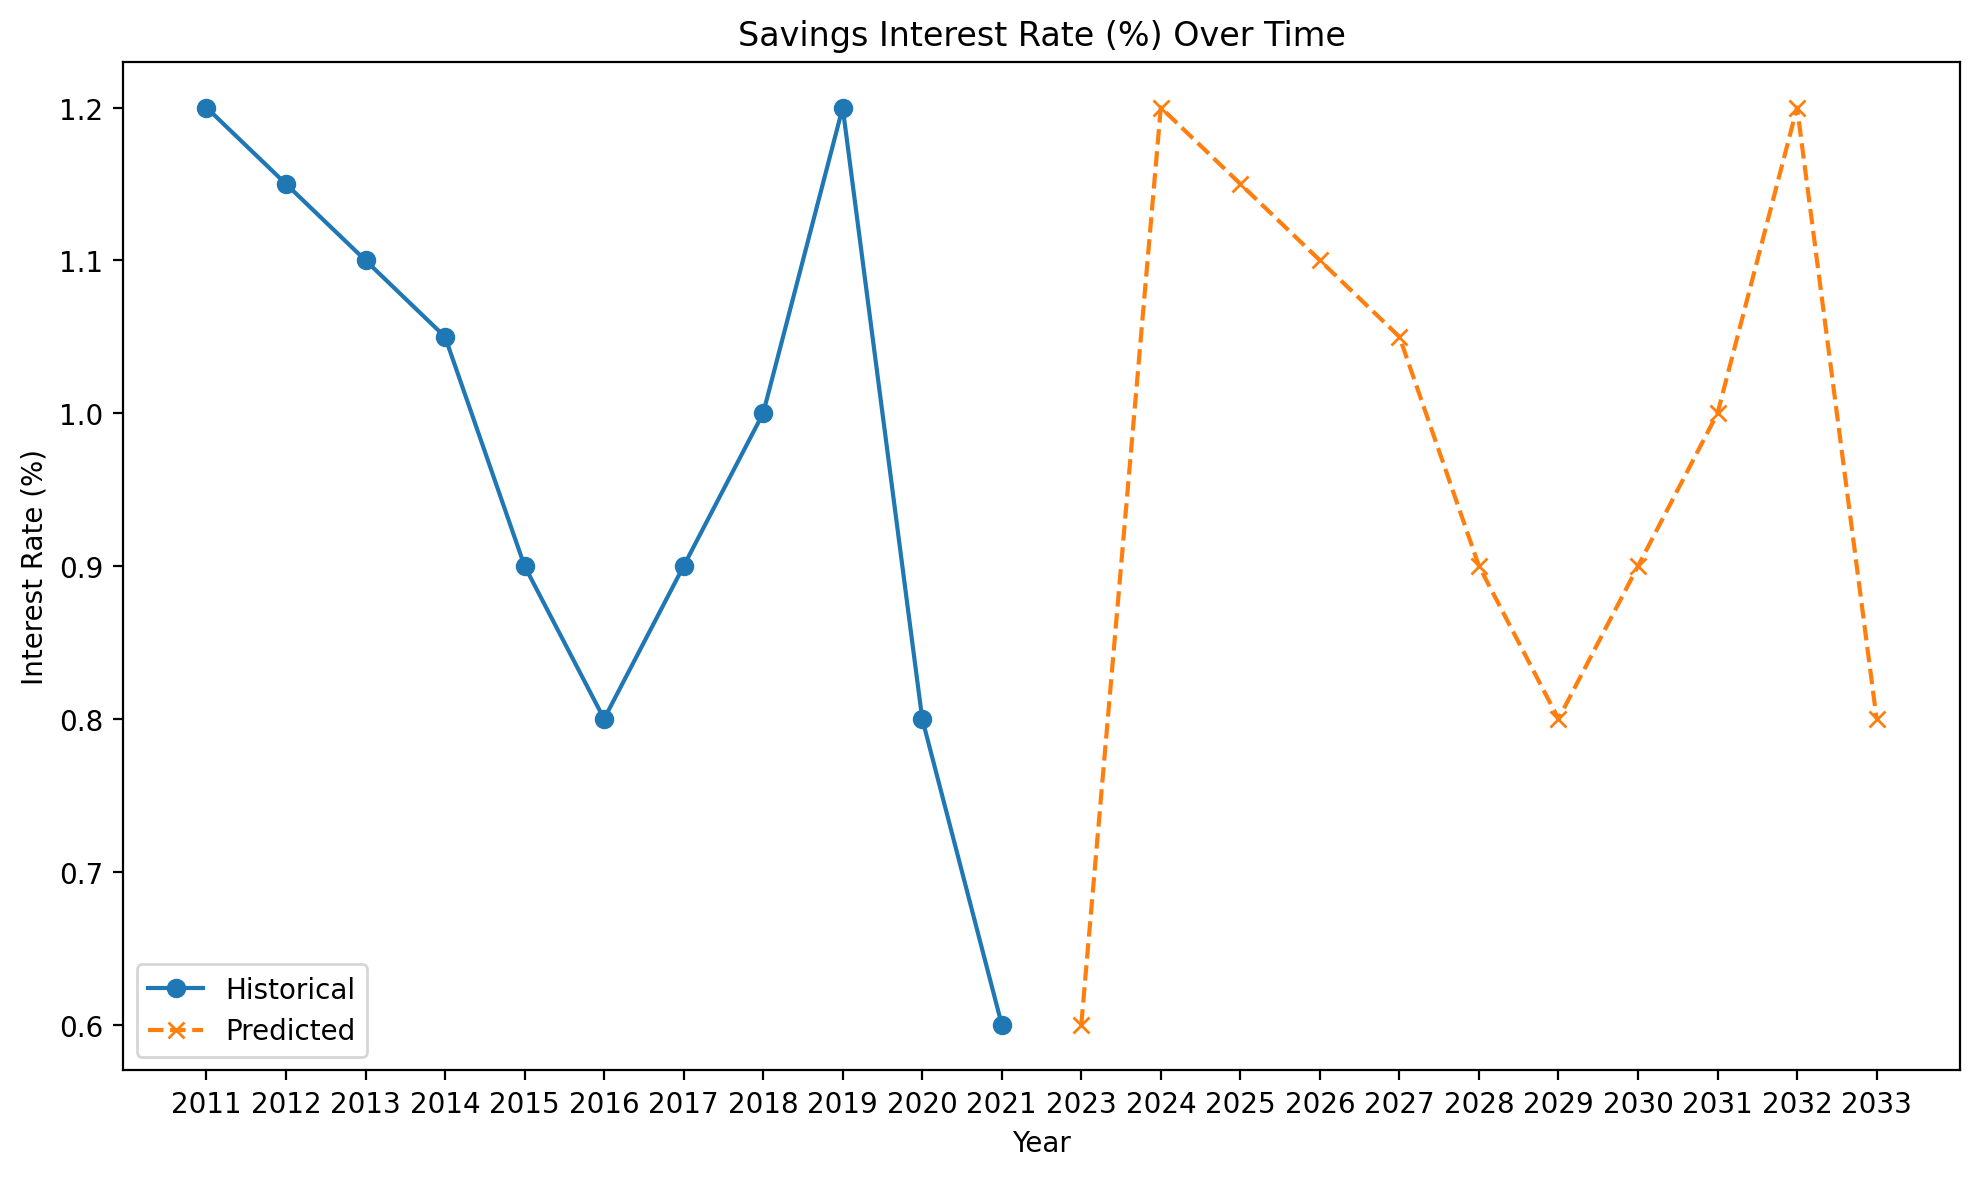

Predictions for 2024 to 2033 have been saved to 'predicted_savings_interest_rate.csv'.
    Year  ANNUAL  Savings Interest Rate (%)
1   2024                               1.20
2   2025                               1.15
3   2026                               1.10
4   2027                               1.05
5   2028                               0.90
6   2029                               0.80
7   2030                               0.90
8   2031                               1.00
9   2032                               1.20
10  2033                               0.80


In [47]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load and clean the dataset
savings_interest_rate_data = pd.read_csv('gdrive/MyDrive/sec-data/saving_account_interest_rate.csv')
savings_interest_rate_data.columns = savings_interest_rate_data.columns.str.strip()  # Clean column names
savings_interest_rate_data.rename(columns={'Date': 'Year'}, inplace=True)  # Rename for consistency
savings_interest_rate_data['Year'] = pd.PeriodIndex(savings_interest_rate_data['Year'], freq='Y')  # Convert to PeriodIndex

# Define the metric to predict
metric_to_predict = 'ANNUAL  Savings Interest Rate (%)'

# Set up the SARIMA model for prediction
ts_data = savings_interest_rate_data.set_index('Year')[metric_to_predict]

# Fit the SARIMA model
sarima_model = SARIMAX(ts_data, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecast for 2023 to 2033
forecast_years = pd.period_range(start='2023', end='2033', freq='Y')
forecast_values = sarima_fit.get_forecast(steps=len(forecast_years)).predicted_mean

# Create a DataFrame for predictions
sarima_predictions_df = pd.DataFrame({
    'Year': forecast_years.astype(str),  # Convert PeriodIndex to string for saving
    metric_to_predict: forecast_values.values
})

# Filter out 2023 from the output (only 2024-2033)
sarima_predictions_filtered = sarima_predictions_df[sarima_predictions_df['Year'] >= '2024']

# Save the filtered predictions to a CSV file
output_file = 'predicted_savings_interest_rate.csv'
sarima_predictions_filtered.to_csv(output_file, index=False)

# Combine historical and predicted data for visualization
historical_data = savings_interest_rate_data.set_index('Year')[metric_to_predict]
predicted_data = sarima_predictions_df.set_index('Year')

# Combine historical and predicted data
combined_data = pd.concat([historical_data, predicted_data], axis=0)

# Plot the historical and predicted data
plt.figure(figsize=(10, 6))
plt.plot(historical_data.index.astype(str), historical_data, label='Historical', marker='o')
plt.plot(predicted_data.index.astype(str), predicted_data[metric_to_predict], label='Predicted', linestyle='--', marker='x')
plt.title('Savings Interest Rate (%) Over Time')
plt.xlabel('Year')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

# Print a confirmation message
print(f"Predictions for 2024 to 2033 have been saved to '{output_file}'.")

# Display the resulting predictions
print(sarima_predictions_filtered)


<Figure size 1400x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Stock Open (CAD) Over Time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Stock Open (CAD)')

<Axes: >

Text(0.5, 1.0, 'Stock Close (CAD) Over Time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Stock Close (CAD)')

<Axes: >

Text(0.5, 1.0, 'Mutual Fund Price Over Time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Mutual Fund Price')

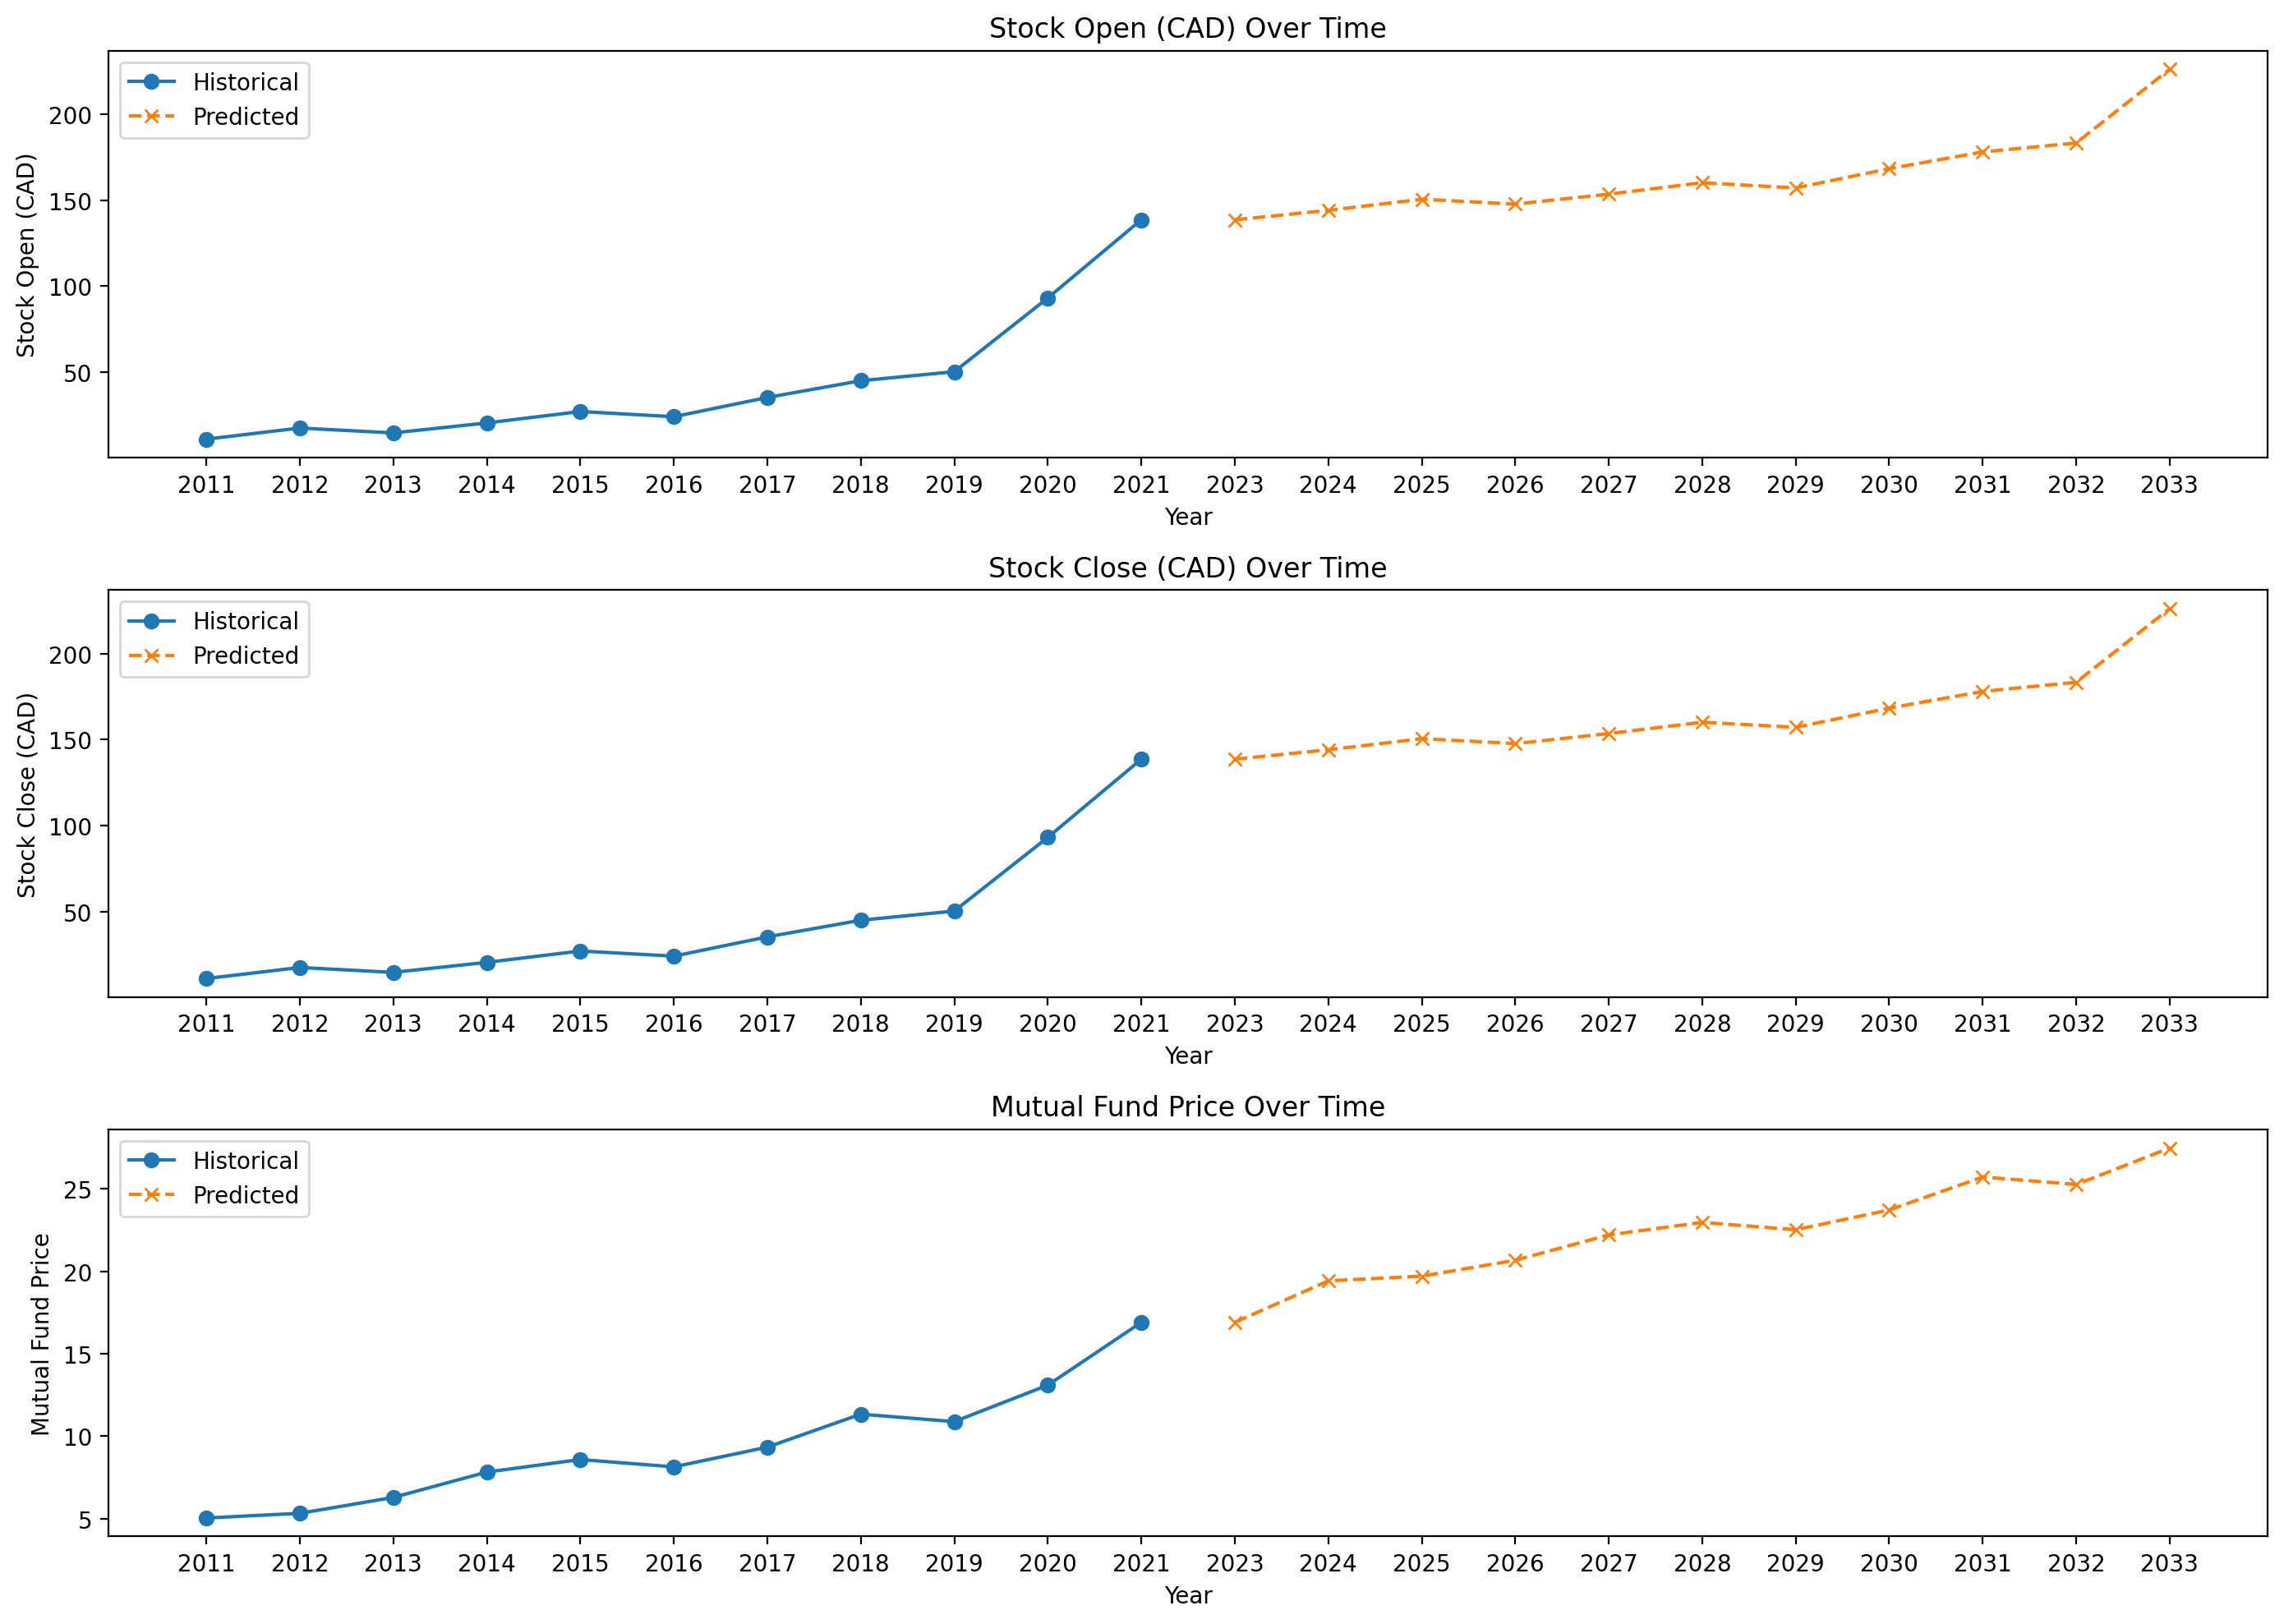

Predictions for 2024 to 2033 have been saved to 'predicted_stock_and_mutual_fund.csv'.
    Year  Stock Open (CAD)  Stock Close (CAD)  Mutual Fund Price
1   2024        144.029181         144.154056          19.420616
2   2025        150.490623         150.598948          19.702500
3   2026        147.645126         147.756600          20.666172
4   2027        153.450654         153.587191          22.204624
5   2028        160.093959         160.190068          22.963870
6   2029        157.054114         157.202906          22.518950
7   2030        168.263714         168.414993          23.716037
8   2031        177.992360         178.104961          25.714722
9   2032        183.231074         183.451112          25.262561
10  2033        226.108257         226.312052          27.473381


In [50]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load and clean the dataset
stock_mutual_fund_data = pd.read_csv('gdrive/MyDrive/sec-data/stock_and_mutual_fund.csv')
stock_mutual_fund_data['Date'] = pd.to_datetime(stock_mutual_fund_data['Date'])
stock_mutual_fund_data['Year'] = stock_mutual_fund_data['Date'].dt.year

# Aggregate data by year, calculating the mean for each metric
yearly_data = stock_mutual_fund_data.groupby('Year').mean()

# Reset the index to make 'Year' a column again
yearly_data.reset_index(inplace=True)

# Convert 'Year' to PeriodIndex for SARIMA compatibility
yearly_data['Year'] = pd.PeriodIndex(yearly_data['Year'], freq='Y')

# Define the metrics to predict
metrics_to_predict = ['Stock Open (CAD)', 'Stock Close (CAD)', 'Mutual Fund Price']

# Create a dictionary to store SARIMA models and predictions
sarima_predictions = {}

# Fit SARIMA models and predict each metric for 2023 to 2033
forecast_years = pd.period_range(start='2023', end='2033', freq='Y')
for metric in metrics_to_predict:
    # Set the metric as a time series
    ts_data = yearly_data.set_index('Year')[metric]

    # Fit the SARIMA model
    sarima_model = SARIMAX(ts_data, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
    sarima_fit = sarima_model.fit(disp=False)

    # Forecast for 2023 to 2033
    forecast = sarima_fit.get_forecast(steps=len(forecast_years)).predicted_mean
    sarima_predictions[metric] = forecast.values

# Create a DataFrame for predictions
sarima_predictions_df = pd.DataFrame({
    'Year': forecast_years.astype(str),  # Convert PeriodIndex to string for saving
    **sarima_predictions
})

# Filter out 2023 from the output (only 2024-2033)
sarima_predictions_filtered = sarima_predictions_df[sarima_predictions_df['Year'] >= '2024']

# Save the filtered predictions to a CSV file
output_file = 'predicted_stock_and_mutual_fund.csv'
sarima_predictions_filtered.to_csv(output_file, index=False)

# Combine historical and predicted data for visualization
historical_data = yearly_data.set_index('Year')[metrics_to_predict]
predicted_data = sarima_predictions_df.set_index('Year')

# Combine historical and predicted data
combined_data = pd.concat([historical_data, predicted_data], axis=0)

# Plot the historical and predicted data for each metric
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics_to_predict, start=1):
    plt.subplot(3, 1, i)
    plt.plot(historical_data.index.astype(str), historical_data[metric], label='Historical', marker='o')
    plt.plot(predicted_data.index.astype(str), predicted_data[metric], label='Predicted', linestyle='--', marker='x')
    plt.title(f'{metric} Over Time')
    plt.xlabel('Year')
    plt.ylabel(metric)
    plt.legend()

plt.tight_layout()
plt.show()

# Print a confirmation message
print(f"Predictions for 2024 to 2033 have been saved to '{output_file}'.")

# Display the resulting predictions
print(sarima_predictions_filtered)
